# Sharpening (Keskinleştirme) Filtresi

https://abdulsamet-ileri.medium.com/g%C3%B6r%C3%BCnt%C3%BC-filtrelerini-uygulama-ve-kenarlar%C4%B1-alg%C4%B1lama-21d42f194db4

* İnsana verilmiş olan görsel algı, bir görüntünün kenarlarına ve ince detaylarına karşı son derece duyarlıdır. Bunun sebebi kenarların ve ince detayların yüksek frekanslı bileşenler tarafından oluşturulmasıdır. 
* Görüntüdeki yüksek frekanslı bileşenleri zayıflatır veya kaldırırsak, görüntümüzün görsel kalitesi bu nispette azalacaktır. Fakat tersi işlemi düşünürsek yani görüntüdeki yüksek frekanslı bileşenleri geliştirirsek bu görsel kalitede bir iyileşmeye yol açacaktır. 
* Image sharpening (görüntü keskinleştirmesi), bir görüntüdeki kenarları ve ince ayrıntıları vurgulayan, geliştiren herhangi bir geliştirme tekniğini ifade eder.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
bgr = cv2.imread('./images/dog.png')

In [3]:
# kernelleri tanımlıyoruz.
kernel_sharpen_1 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
kernel_sharpen_2 = np.array([[1,1,1], [1,-7,1], [1,1,1]])
kernel_sharpen_3 = np.array([[-1,-1,-1,-1,-1],
                             [-1, 2, 2, 2,-1],
                             [-1, 2, 8, 2,-1],
                             [-1, 2, 2, 2,-1],
                             [-1,-1,-1,-1,-1]]) / 8.0

# tanımladığımız kerneli, görüntüye uyguluyoruz.
output_1 = cv2.filter2D(bgr, -1, kernel_sharpen_1)
output_2 = cv2.filter2D(bgr, -1, kernel_sharpen_2)
output_3 = cv2.filter2D(bgr, -1, kernel_sharpen_3)

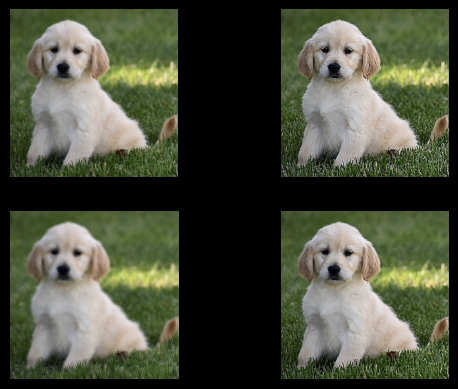

In [4]:
plt.subplot(221)
plt.imshow(cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(222)
plt.imshow(cv2.cvtColor(output_1,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(223)
plt.imshow(cv2.cvtColor(output_2,cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(224)
plt.imshow(cv2.cvtColor(output_3,cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*X7VLxeGD1eO--utHLlVtEA.png)

* Sharpening level’ın kullandığımız kernele göre değişir.

* Fakat kullandığımız bu kerneller ile output görüntümüzü yapay olarak geliştirmiş olduk. Görüntümüzün daha doğal görünmesini istiyorsak bir edge enhancement filter kullanmalıyız. Temel konsept aynı kalacak fakat gaussian kernel ile bu işlemi yapacağız. Bu kernel, kenarları geliştirerek görüntüyü düzeltmemize yardımcı olacak, böylece görüntü daha doğal görünecektir.

![](https://miro.medium.com/v2/resize:fit:828/format:webp/1*ZP7umkWWJvo-2cXSe6pI6w.png)

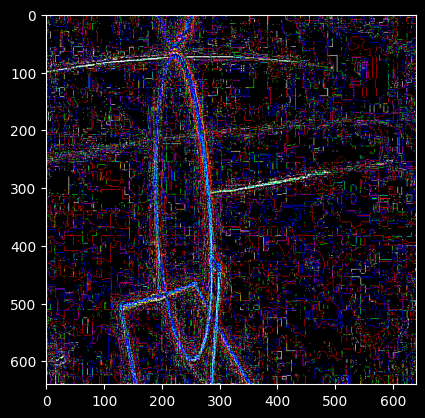

In [11]:
bgr = cv2.imread('./images/circle.jpg')
blurred_image = cv2.GaussianBlur(bgr, (3, 3), 0)
enhanced_image = bgr - blurred_image
plt.imshow(cv2.cvtColor(enhanced_image,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import cv2
import numpy as np

# read image as grayscale
img = cv2.imread('./images/circle.jpg', cv2.IMREAD_GRAYSCALE)

# threshold to binary
thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY)[1]

# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
morph = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)

# find contours - write black over all small contours
# find contours - write black over all small contours
letter = morph.copy()
cntrs, _ = cv2.findContours(morph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for c in cntrs:
    area = cv2.contourArea(c)
    if area < 100:
        cv2.drawContours(letter,[c],0,(0,0,0),-1)

# do canny edge detection
edges = cv2.Canny(letter, 200, 200)

# show results
cv2.imshow("K_thresh", thresh)
cv2.imshow("K_morph", morph)
cv2.imshow("K_letter", letter)
cv2.imshow("K_edges", edges)
cv2.waitKey(0)

-1